# Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing # label encoder
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import RandomizedSearchCV

# Data Exploration

In [78]:
test_data = pd.read_csv("music30s_test.csv")
train_data_X = pd.read_csv("music30s_trainin.csv")
train_data_Y = pd.read_csv("music30s_trainlabel.csv")

There is a column for indexing the data points called 'Unnamed: 0', which can be dropped as it provides no useful information to the model.

In [ ]:
# dropping the index column
train_data_X.drop('Unnamed: 0', axis=1, inplace=True)
train_data_Y.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
train_data_X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661504,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,...,-4.922164,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205
1,661504,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,...,5.730653,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748
2,661794,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,...,-0.442143,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231
3,661794,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,...,0.975607,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821
4,661794,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,...,6.971109,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340


In [ ]:
train_data_Y.head()

,label
0,reggae
1,reggae
2,country
3,blues
4,metal


In [ ]:
train_data_X.shape

(900, 58)

The training dataset has 900 data points and 58 features.

In [ ]:
train_data_Y.shape

(900, 1)

In [ ]:
train_data_Y['label'].value_counts()

rock         95
reggae       91
country      91
metal        91
hiphop       91
jazz         89
classical    89
disco        89
pop          88
blues        86
Name: label, dtype: int64

A fairly balanced dataset.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Checking how many unique values each column/parameter has:

In [ ]:
for col in train_data_X.columns:
    print(f'{col} -->\t', train_data_X[col].nunique())

length -->	 34
chroma_stft_mean -->	 887
chroma_stft_var -->	 887
rms_mean -->	 887
rms_var -->	 887
spectral_centroid_mean -->	 887
spectral_centroid_var -->	 887
spectral_bandwidth_mean -->	 887
spectral_bandwidth_var -->	 887
rolloff_mean -->	 887
rolloff_var -->	 887
zero_crossing_rate_mean -->	 885
zero_crossing_rate_var -->	 887
harmony_mean -->	 887
harmony_var -->	 887
perceptr_mean -->	 887
perceptr_var -->	 887
tempo -->	 35
mfcc1_mean -->	 887
mfcc1_var -->	 887
mfcc2_mean -->	 887
mfcc2_var -->	 887
mfcc3_mean -->	 887
mfcc3_var -->	 887
mfcc4_mean -->	 887
mfcc4_var -->	 887
mfcc5_mean -->	 887
mfcc5_var -->	 887
mfcc6_mean -->	 887
mfcc6_var -->	 887
mfcc7_mean -->	 887
mfcc7_var -->	 887
mfcc8_mean -->	 887
mfcc8_var -->	 887
mfcc9_mean -->	 887
mfcc9_var -->	 887
mfcc10_mean -->	 887
mfcc10_var -->	 887
mfcc11_mean -->	 887
mfcc11_var -->	 887
mfcc12_mean -->	 887
mfcc12_var -->	 887
mfcc13_mean -->	 887
mfcc13_var -->	 887
mfcc14_mean -->	 887
mfcc14_var -->	 887
mfcc1

Clearly, **"length"** won't be a useful feature as it is basically the same for each song (as each song is nearly 30 seconds long).

In [ ]:
# Dropping length
train_data_X.drop('length', axis = 1, inplace = True)

In [ ]:
train_data_X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,4.659712e+06,...,-4.922164,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205
1,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,1.063089e+06,...,5.730653,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748
2,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,2.651598e+06,...,-0.442143,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231
3,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,1.247085e+06,...,0.975607,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821
4,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,7.265238e+05,...,6.971109,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340


I have a feeling that tempo could be a very useful feature to categorise the genres.

In [ ]:
print(min(train_data_X.tempo),max(train_data_X.tempo))

54.978390957446805 234.90767045454547


# Box plot

 Checking the ranges of tempo for different genres.

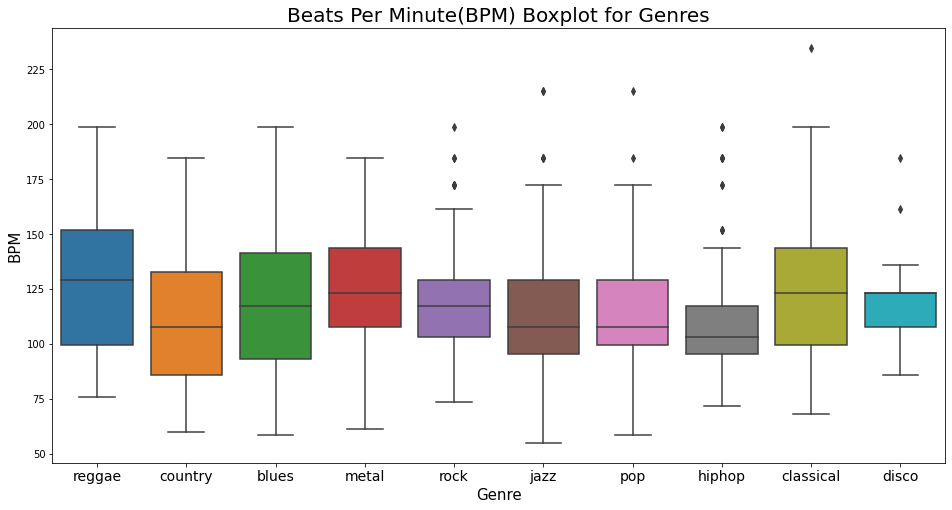

In [ ]:
x = pd.DataFrame(train_data_X["tempo"])
x['label'] = train_data_Y['label']

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x);

plt.title('Beats Per Minute(BPM) Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

There is a lot of overlap in the values of *tempo*, and thus it is hard to distinguish music based on tempo alone.

# Label encoding

Encoding the categorical values of the class labels so that it is possible to predict the genre using ML models.

In [ ]:
label_encoder = preprocessing.LabelEncoder()
train_data_Y['label'] = label_encoder.fit_transform(train_data_Y['label'])

Although after reviewing the sklearn documentation, we learnt that sklearn by default calls a label encoder on any target variable you pass to it. Even still, we think it's better to encode it as there is no harm in doing so.

In [ ]:
train_data_X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,4.659712e+06,...,-4.922164,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205
1,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,1.063089e+06,...,5.730653,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748
2,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,2.651598e+06,...,-0.442143,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231
3,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,1.247085e+06,...,0.975607,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821
4,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,7.265238e+05,...,6.971109,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340


In [ ]:
train_data_Y.head()

,label
0,8
1,8
2,2
3,0
4,6


# ML techniques

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

A single split for all the ML models.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_Y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((630, 57), (270, 57), (630, 1), (270, 1))

A function for running each model on the dataset.

In [ ]:
def model_assess(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5)*100, '%\n')
    print('F1 macro', title, ':', round(f1_score(y_test, preds, average = 'macro'), 5)*100, '%\n')
    print('Macro averaged precision', title, ':', round(precision_score(y_test, preds, average = 'macro'), 5)*100, '%\n')
    print('Macro averaged recall', title, ':', round(recall_score(y_test, preds, average = 'macro'), 5)*100, '%\n')


Below we compare results of an untuned model on raw data and normalized data.

# Without Normalizing data

In [ ]:
def random_cv(model, grid, X_train, y_train):
    # Applying RandomizedSearchCV (using "f1_macro" as the scoring parameter)
    model_random_cv = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 10, cv = 5, verbose=3, random_state=42, n_jobs = -1, scoring = 'f1_macro')

    # Fitting the random search model on the train data
    model_random_cv.fit(X_train, y_train)

    # Obtaining and returning the best model based on the data
    best_random_cv = model_random_cv.best_estimator_
    return best_random_cv

Hyperparameter grids:

In [ ]:
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}

sgd_params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
              'eta0': [1, 10, 100] 
              }

knn_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
rf_params = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split':  [2, 5, 10],
               'min_samples_leaf': [1, 2, 4, 10],
               'bootstrap': [True, False]}

lg_params = {'solver': ['lbfgs', 'liblinear'],
            'penalty': ['l2'],
            'C': [100, 10, 1.0, 0.1, 0.01]
            }

xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10]
        }


In [ ]:
def apply_models_1(X_train, y_train, X_test, y_test, model_specific = None, param_grid = None):
    if model_specific == None:
        # Naive Bayes
        nb = GaussianNB()
        nb_random = random_cv(nb, nb_params, X_train, y_train)
        model_assess(nb_random, X_train, y_train, X_test, y_test, "Naive Bayes")

        # Stochastic Gradient Descent
        sgd = SGDClassifier(max_iter=5000, random_state=0)
        sgd_random = random_cv(sgd, sgd_params, X_train, y_train)
        model_assess(sgd_random, X_train, y_train, X_test, y_test, "Stochastic Gradient Descent")

        # KNN
        knn = KNeighborsClassifier()
        knn_random = random_cv(knn, knn_params, X_train, y_train)
        model_assess(knn_random, X_train, y_train, X_test, y_test, "KNN")
        
        # Logistic Regression
        lg = LogisticRegression()
        lg_random = random_cv(lg, lg_params, X_train, y_train)
        model_assess(lg_random, X_train, y_train, X_test, y_test, "Logistic Regression")

        # Random Forest
        rf = RandomForestClassifier(random_state=0)
        rf_random = random_cv(rf, rf_params, X_train, y_train)
        model_assess(rf_random, X_train, y_train, X_test, y_test, "Random Forest")
    else:

        specific_model_random = random_cv(model_specific, param_grid, X_train, y_train)
        model_assess(model_specific, X_train, y_train, X_test, y_test, f"{model_specific}")

In [ ]:
def apply_xgboost(X_train, y_train, X_test, y_test):
    # Cross Gradient Booster
    xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, random_state = 0)
    xgb_random = random_cv(xgb, xgb_params, X_train, y_train)
    model_assess(xgb_random, X_train, y_train, X_test, y_test, "Cross Gradient Booster")    

In [ ]:
apply_models_1(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Naive Bayes : 33.704 %

F1 macro Naive Bayes : 28.275 %

Macro averaged precision Naive Bayes : 30.659999999999997 %

Macro averaged recall Naive Bayes : 34.043 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Stochastic Gradient Descent : 26.667 %

F1 macro Stochastic Gradient Descent : 24.923000000000002 %

Macro averaged precision Stochastic Gradient Descent : 27.546 %

Macro averaged recall Stochastic Gradient Descent : 26.046999999999997 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy KNN : 30.741000000000003 %

F1 macro KNN : 30.070999999999998 %

Macro averaged precision KNN : 31.097 %

Macro averaged recall KNN : 31.247999999999998 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Logistic Regression : 57.037000000000006 %

F1 macro Logistic Regression : 56.362 %

Macro averaged precision Logistic Regression : 57.29 %

Macro averaged reca

In [ ]:
apply_xgboost(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Cross Gradient Booster : 72.963 %

F1 macro Cross Gradient Booster : 72.869 %

Macro averaged precision Cross Gradient Booster : 73.05 %

Macro averaged recall Cross Gradient Booster : 72.812 %



# Normalizing the data to remove bias.

Using MinMaxScaler as negative values are present.

In [ ]:
def normalize_data(X):
    cols = X.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(X)

    # new data frame with the new scaled data.
    X = pd.DataFrame(np_scaled, columns = cols)
    return X

In [ ]:
train_data_X_scaled = normalize_data(train_data_X)

Normalized data:

In [ ]:
train_data_X_scaled.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.530572,0.696619,0.348285,0.171782,0.651867,0.430339,0.794782,0.381320,0.734768,0.537232,...,0.375180,0.253684,0.425846,0.152855,0.487987,0.186600,0.493990,0.182985,0.505029,0.097221
1,0.461259,0.768463,0.218712,0.061847,0.414080,0.078950,0.442797,0.147385,0.448646,0.121256,...,0.746220,0.138621,0.323413,0.109383,0.627626,0.172325,0.512566,0.111376,0.577711,0.106449
2,0.414717,0.621645,0.238531,0.041302,0.453231,0.176784,0.630752,0.212154,0.483227,0.304979,...,0.531220,0.111116,0.475342,0.092210,0.253925,0.096312,0.481367,0.058977,0.429967,0.051064
3,0.513368,0.682207,0.432729,0.128805,0.340710,0.081045,0.388727,0.164700,0.388363,0.142536,...,0.580601,0.101573,0.371888,0.052957,0.412203,0.093881,0.493261,0.089770,0.521860,0.084807
4,0.577931,0.526624,0.232481,0.013004,0.439586,0.042220,0.394737,0.113543,0.433538,0.082329,...,0.789426,0.082518,0.158994,0.066036,0.417036,0.045884,0.203264,0.062997,0.520941,0.044907


Split the data

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(train_data_X_scaled, train_data_Y, test_size=0.3, random_state=1)
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((630, 57), (270, 57), (630, 1), (270, 1))

Test the models

In [ ]:
apply_models_1(X_train_scaled, y_train, X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Naive Bayes : 55.184999999999995 %

F1 macro Naive Bayes : 54.986999999999995 %

Macro averaged precision Naive Bayes : 58.571 %

Macro averaged recall Naive Bayes : 55.108000000000004 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Stochastic Gradient Descent : 68.889 %

F1 macro Stochastic Gradient Descent : 69.441 %

Macro averaged precision Stochastic Gradient Descent : 70.27799999999999 %

Macro averaged recall Stochastic Gradient Descent : 69.116 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy KNN : 64.444 %

F1 macro KNN : 64.51400000000001 %

Macro averaged precision KNN : 66.863 %

Macro averaged recall KNN : 64.306 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Logistic Regression : 69.63000000000001 %

F1 macro Logistic Regression : 70.336 %

Macro averaged precision Logistic Regression : 71.281 %

Macro averaged recall Logistic Re

In [ ]:
apply_xgboost(X_train_scaled, y_train, X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Cross Gradient Booster : 72.963 %

F1 macro Cross Gradient Booster : 72.964 %

Macro averaged precision Cross Gradient Booster : 73.286 %

Macro averaged recall Cross Gradient Booster : 72.847 %




Much better individual model performance is observed after normalizing. So, we will continue to tune the models on the scaled data itself.

# Feature selection




In [ ]:
df = train_data_X_scaled # ease of use

## Method 1: Correlation matrix

Inter-feature correlation.

In [ ]:
df['label'] = train_data_Y['label']

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
chroma_stft_mean,1.000000,-0.467105,0.502690,0.265095,0.622335,0.287924,0.518490,0.032717,0.602547,0.112658,0.561543,0.364056,0.032627,0.280625,-0.121927,0.469012,0.042759,0.667703,-0.119778,-0.608502,-0.055474,-0.065319,0.005898,0.272188,0.146710,-0.015865,0.038937,0.418605,0.109446,0.063386,0.079927,0.506331,-0.030132,0.117075,-0.160032,0.497246,-0.185250,0.076261,-0.302142,0.517832,-0.407034,-0.084809,-0.441500,0.420769,-0.446795,-0.141041,-0.443049,0.327392,-0.449116,-0.157302,-0.451508,0.276281,-0.475746,-0.082322,-0.505731,0.276133,-0.553559,0.366566
chroma_stft_var,-0.467105,1.000000,-0.083411,0.291131,-0.251986,0.300476,-0.038109,0.346116,-0.172496,0.385012,-0.473592,0.160500,-0.004876,0.046018,0.099730,0.016627,-0.095506,-0.344838,0.355312,0.127316,0.340981,0.414039,0.417000,-0.259740,0.382725,0.356763,0.408402,-0.216490,0.445903,0.284166,0.428956,-0.320147,0.442138,0.207846,0.472145,-0.300594,0.419897,0.233533,0.382233,-0.357958,0.381839,0.307015,0.388127,-0.291596,0.366865,0.278563,0.377564,-0.321096,0.368829,0.216607,0.397757,-0.228460,0.388020,0.194436,0.372762,-0.232772,0.336580,-0.077492
rms_mean,0.502690,-0.083411,1.000000,0.607829,0.511841,0.318837,0.531113,0.092345,0.538348,0.194731,0.336804,0.317980,0.062745,0.894877,-0.006212,0.793035,-0.027117,0.808025,-0.178887,-0.486595,-0.010963,0.135279,-0.034088,0.012074,0.177055,0.114429,0.059185,0.110096,0.212248,0.173228,0.109800,0.163302,0.074890,0.223906,-0.003234,0.185067,-0.005200,0.131836,-0.126657,0.178338,-0.197636,0.015508,-0.239818,0.169519,-0.219124,0.003405,-0.214804,0.093579,-0.161510,-0.015763,-0.160568,0.127452,-0.164188,0.042979,-0.215376,0.125381,-0.260406,0.215817
rms_var,0.265095,0.291131,0.607829,1.000000,0.346874,0.591182,0.403071,0.338832,0.366791,0.434791,0.156177,0.568889,0.084156,0.596829,0.138712,0.781069,-0.096391,0.324227,0.286928,-0.369828,0.360901,0.298053,0.351069,-0.229917,0.469400,0.269014,0.361595,-0.162030,0.541597,0.324483,0.363527,-0.134258,0.391071,0.332345,0.313085,-0.072034,0.286220,0.277192,0.166335,-0.082085,0.094530,0.237260,0.099843,-0.031353,0.054312,0.221459,0.059571,-0.090746,0.089921,0.182814,0.101919,0.007415,0.057356,0.197049,0.041623,0.033496,0.002954,0.106915
spectral_centroid_mean,0.622335,-0.251986,0.511841,0.346874,1.000000,0.509232,0.903297,-0.001028,0.979116,0.186111,0.875617,0.667202,0.050969,0.322828,-0.023106,0.555843,0.003661,0.723406,-0.199344,-0.941505,-0.023063,0.182100,-0.100172,-0.130409,0.147185,0.065266,-0.092518,0.020778,0.167430,0.212982,0.019332,0.132344,0.031780,0.286773,-0.082329,0.196649,-0.071074,0.157122,-0.154643,0.172847,-0.245011,0.052142,-0.232264,0.183004,-0.208511,0.028188,-0.206694,0.164623,-0.183853,0.034942,-0.154586,0.246888,-0.133157,0.035625,-0.151967,0.277856,-0.216757,0.358527
spectral_centroid_var,0.287924,0.300476,0.318837,0.591182,0.509232,1.000000,0.614366,0.638436,0.533959,0.819524,0.244081,0.846002,0.064770,0.280733,0.138401,0.476683,-0.079956,0.198523,0.360080,-0.537324,0.690610,0.563030,0.410140,-0.354032,0.569126,0.466462,0.391286,-0.215083,0.566268,0.484577,0.428069,-0.201550,0.419930,0.465136,0.358544,-0.169270,0.338771,0.392959,0.175510,-0.174861,0.095870,0.369017,0.098172,-0.145407,0.064554,0.314371,0.060715,-0.191629,0.074559,0.189937,0.100294,-0.048735,0.0

Since it is hard to read, we can print the highest correlation for each column.

In [ ]:
important_cols = [] # list of columns to consider for feature selection 

for col in df.columns:
    highest_correlation_value = sorted(correlation_matrix[col].abs(), reverse = True)[1]
    if highest_correlation_value > 0.9:
        print(col, '=', highest_correlation_value)
        important_cols.append(col)

spectral_centroid_mean = 0.9791163198416303
spectral_bandwidth_mean = 0.9563233273347181
rolloff_mean = 0.9791163198416303
mfcc2_mean = 0.9415048724909579


In [ ]:
def get_corr_above_thresh(current_feature, threshold):
    
    '''
    A function we made to take in a feature and return all features that have a correlation greater than a threshold value.
    '''
    high_corr = correlation_matrix[correlation_matrix[current_feature].abs()>threshold] # highly correlated features
    names = high_corr.index
    # print(names)

    corr_vals = []
    var_names = []
    for name in names:
        if name == current_feature:
            idx = names.to_list().index(name)
        else:
            var_names.append(name)
            corr_vals.append(high_corr[name].to_list())

    print("Looking at :", current_feature, "\n")
    for i, val in enumerate(corr_vals):
        print(var_names[i], round(val[idx], 4))
        if i == 0:
            max_val = correlation_matrix['label'][var_names[i]]
            col_max = var_names[i]
        else:
            val = correlation_matrix['label'][var_names[i]]
            if val>max_val:
                max_val = correlation_matrix['label'][var_names[i]]
                col_max = var_names[i]


    print(f"Result: Correlation with class label is maximum of {col_max} with value {round(max_val,4)}.\n")
    return col_max

In [ ]:
cols_to_keep = set()

In [ ]:
for col in important_cols:
    cols_to_keep.add(get_corr_above_thresh(col, 0.9))

Looking at : spectral_centroid_mean 

spectral_bandwidth_mean 0.9033
rolloff_mean 0.9791
mfcc2_mean -0.9415
Result: Correlation with class label is maximum of spectral_bandwidth_mean with value 0.3759.

Looking at : spectral_bandwidth_mean 

spectral_centroid_mean 0.9033
rolloff_mean 0.9563
Result: Correlation with class label is maximum of rolloff_mean with value 0.368.

Looking at : rolloff_mean 

spectral_centroid_mean 0.9791
spectral_bandwidth_mean 0.9563
mfcc2_mean -0.9352
Result: Correlation with class label is maximum of spectral_bandwidth_mean with value 0.3759.

Looking at : mfcc2_mean 

spectral_centroid_mean -0.9415
rolloff_mean -0.9352
Result: Correlation with class label is maximum of rolloff_mean with value 0.368.



In [ ]:
cols_to_keep

{'rolloff_mean', 'spectral_bandwidth_mean'}

### Intuition:

We can see that *spectral_centroid_mean* is highly correlated with:

i) spectral_bandwidth_mean

ii) roll_off_mean

iii) mfcc2_mean

To choose which to keep amongst these, we can look at the correlation of these features with the class labels. 

From the example above, we see that roll_off_mean and spectral_bandwidth_mean are to be kept, and the rest can be dropped.

But, spectral_bandwitdh_mean and roll_off mean_are highly correlated and so, it is evident that we can remove one of them. Following the same process as above, we can remove roll_off_mean, as the correlation of spectral_bandwidth_mean with the label is higher.

### Columns to keep

In [ ]:
cols_to_keep -= set(['rolloff_mean'])

In [ ]:
cols_to_keep

{'spectral_bandwidth_mean'}

In [ ]:
cols_to_remove = set(important_cols) - cols_to_keep

In [ ]:
cols_to_remove

{'mfcc2_mean', 'rolloff_mean', 'spectral_centroid_mean'}

We can remove the columns 'mfcc2_mean' & 'spectral_centroid_mean'.

In [ ]:
df.drop(columns = cols_to_remove, axis = 1, inplace = True)

In [ ]:
df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.530572,0.696619,0.348285,0.171782,0.430339,0.794782,0.381320,0.537232,0.452524,0.259804,...,0.253684,0.425846,0.152855,0.487987,0.186600,0.493990,0.182985,0.505029,0.097221,8
1,0.461259,0.768463,0.218712,0.061847,0.078950,0.442797,0.147385,0.121256,0.388623,0.075289,...,0.138621,0.323413,0.109383,0.627626,0.172325,0.512566,0.111376,0.577711,0.106449,8
2,0.414717,0.621645,0.238531,0.041302,0.176784,0.630752,0.212154,0.304979,0.326838,0.087617,...,0.111116,0.475342,0.092210,0.253925,0.096312,0.481367,0.058977,0.429967,0.051064,2
3,0.513368,0.682207,0.432729,0.128805,0.081045,0.388727,0.164700,0.142536,0.269804,0.051991,...,0.101573,0.371888,0.052957,0.412203,0.093881,0.493261,0.089770,0.521860,0.084807,0
4,0.577931,0.526624,0.232481,0.013004,0.042220,0.394737,0.113543,0.082329,0.457238,0.036273,...,0.082518,0.158994,0.066036,0.417036,0.045884,0.203264,0.062997,0.520941,0.044907,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.605883,0.710381,0.351690,0.298530,0.444286,0.680837,0.313984,0.411162,0.430785,0.339010,...,0.157138,0.406094,0.192723,0.721540,0.337967,0.511583,0.218275,0.706441,0.119538,8
896,0.242037,0.781566,0.211031,0.112336,0.043180,0.216402,0.039335,0.095250,0.118610,0.045169,...,0.238375,0.501825,0.185143,0.339583,0.192936,0.579650,0.164808,0.549548,0.119800,0
897,0.575106,0.704038,0.554350,0.471531,0.310077,0.793459,0.308484,0.412795,0.478088,0.299222,...,0.096657,0.535189,0.091867,0.436700,0.153216,0.535433,0.159264,0.536655,0.117211,7
898,0.540919,0.842817,0.629269,0.493469,0.243448,0.621844,0.436811,0.553104,0.117938,0.063664,...,0.105459,0.409805,0.094211,0.389977,0.081999,0.429389,0.069634,0.422322,0.101887,4


In [ ]:
X_data = df.drop('label', axis = 1)

In [ ]:
Y_data = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((630, 54), (270, 54), (630,), (270,))

In [ ]:
apply_models_1(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Naive Bayes : 53.70399999999999 %

F1 macro Naive Bayes : 52.925 %

Macro averaged precision Naive Bayes : 58.679 %

Macro averaged recall Naive Bayes : 53.971000000000004 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Stochastic Gradient Descent : 68.51899999999999 %

F1 macro Stochastic Gradient Descent : 69.071 %

Macro averaged precision Stochastic Gradient Descent : 70.06 %

Macro averaged recall Stochastic Gradient Descent : 68.71300000000001 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy KNN : 67.407 %

F1 macro KNN : 68.55 %

Macro averaged precision KNN : 70.746 %

Macro averaged recall KNN : 67.75999999999999 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Logistic Regression : 70.37 %

F1 macro Logistic Regression : 71.017 %

Macro averaged precision Logistic Regression : 72.224 %

Macro averaged recall Logistic Regression : 70.75

In [ ]:
apply_xgboost(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy Cross Gradient Booster : 72.963 %

F1 macro Cross Gradient Booster : 72.994 %

Macro averaged precision Cross Gradient Booster : 73.272 %

Macro averaged recall Cross Gradient Booster : 72.87700000000001 %



Best performance by XGBoost in this setting.
(This cell is written after the entire code is done)

In [83]:
test_data = test_data[X_data.columns]
test_data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.326701,0.091451,0.056816,0.001078,468047.938162,1736.646891,185305.764094,2.599021e+06,0.071181,0.002747,...,2.877666,75.942657,1.237590,135.273865,1.965581,140.919281,0.791661,109.242943,-4.267680,177.675522
1,0.437906,0.094107,0.005276,0.000030,94103.177831,1614.749295,207167.296701,1.049578e+06,0.031534,0.000126,...,4.095938,14.534595,4.332311,13.931521,3.357461,15.662603,2.624509,20.659353,1.659115,23.679209
2,0.457251,0.090083,0.285521,0.006891,939226.160293,2441.508002,158175.792905,2.076888e+06,0.097706,0.005135,...,12.258653,66.535225,-7.046246,67.616226,4.735236,58.401016,1.867201,57.100945,0.030806,67.664940
3,0.342450,0.103002,0.045812,0.001188,732352.809385,2731.147995,342129.725183,7.019174e+06,0.042835,0.000850,...,3.157343,17.922062,0.284560,19.612217,-1.377794,20.133987,-1.593034,16.212904,-1.996848,18.466488
4,0.294790,0.092382,0.061659,0.001761,699906.211340,2036.555526,130918.151667,1.888032e+06,0.102753,0.004918,...,-2.190892,69.668869,-13.639559,112.140495,-6.491189,47.259911,-9.144039,75.013718,-12.712146,63.297348


In [79]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, random_state = 0)
xgb_random = random_cv(xgb, xgb_params, X_train, y_train) #best xgb is stored in xgb_random

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [81]:
# fitting best xgb to entire data
xgb_random.fit(X_data, Y_data)

XGBClassifier(colsample_bytree=0.6, gamma=1.5, learning_rate=0.05,
              n_estimators=1000, objective='multi:softprob', subsample=0.8)

In [84]:
# predict on test data
preds = xgb_random.predict(test_data)

In [86]:
test_labels = []
for pred in preds:
    genre = label_encoder.inverse_transform([pred])
    test_labels.append(genre)

In [87]:
pd.DataFrame(test_labels).to_csv("Abhinav_Sethi_test_data_class_labels.csv", index = False, header = False)

## Method 2: RFE

A function to implement rfe on a dataset given a model and number of features to retain.

In [ ]:
def rfe_model(model, X, y, num_f):
    '''
     model --> ML model on the basis of which features are to be chosen
     X and y is your entire dataset
     num_f --> Number of features to be retained after feature extraction.
    '''
    # step indicates number of features to remove in each iteration.
    rfe_selector = RFE(estimator=model, n_features_to_select = num_f, step = 1)
    rfe_selector.fit(X, y)

    return X.columns[rfe_selector.get_support()]

In [ ]:
def apply_rfe_and_model(model, num_f, params):
    # Getting the relevant columns using the model specified
    cols = rfe_model(model, train_data_X_scaled, train_data_Y, num_f)
    X_data_scaled = train_data_X_scaled[cols]
    Y_data = train_data_Y

    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, Y_data, test_size=0.3, random_state=1)

    # apply models
    apply_models_1(X_train, y_train, X_test, y_test, model_specific = model, param_grid = params)


Selecting features for each model using it as the feature extractor, and then applying the model on the data.

In [ ]:
''' 
Not possible for these:

# Naive Bayes
# apply_rfe_and_model(GaussianNB())

# KNN
# apply_rfe_and_model(KNeighborsClassifier())

# SVC
# apply_rfe_and_model(SVC())
'''

Using 30 features.

In [ ]:
num_features = 30

# Logistic Regression
apply_rfe_and_model(LogisticRegression(),num_features, lg_params)

# Random Forest Classifier
apply_rfe_and_model(RandomForestClassifier(),num_features, rf_params)

# Stochastic Gradient Descent
apply_rfe_and_model(SGDClassifier(),num_features, sgd_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy LogisticRegression() : 62.222 %

F1 macro LogisticRegression() : 61.480000000000004 %

Macro averaged precision LogisticRegression() : 61.917 %

Macro averaged recall LogisticRegression() : 62.36000000000001 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy RandomForestClassifier() : 70.0 %

F1 macro RandomForestClassifier() : 70.18100000000001 %

Macro averaged precision RandomForestClassifier() : 70.537 %

Macro averaged recall RandomForestClassifier() : 70.295 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy SGDClassifier() : 58.519 %

F1 macro SGDClassifier() : 56.259 %

Macro averaged precision SGDClassifier() : 70.197 %

Macro averaged recall SGDClassifier() : 58.532 %



In [ ]:
num_features = 30

# Cross Gradient Booster Classifier
apply_rfe_and_model(XGBClassifier(),num_features, xgb_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy XGBClassifier() : 70.0 %

F1 macro XGBClassifier() : 70.38499999999999 %

Macro averaged precision XGBClassifier() : 70.949 %

Macro averaged recall XGBClassifier() : 70.196 %



The above implementation is not possible for Gaussian Naive Bayes, K Nearest Neighbours, and Support Vector Classifier as they don't have an in-built feature selection framework.

Using 35 features

In [ ]:
num_features = 35

# Logistic Regression
apply_rfe_and_model(LogisticRegression(),num_features, lg_params)

# Random Forest Classifier
apply_rfe_and_model(RandomForestClassifier(),num_features, rf_params)

# Stochastic Gradient Descent
apply_rfe_and_model(SGDClassifier(),num_features, sgd_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy LogisticRegression() : 65.185 %

F1 macro LogisticRegression() : 64.639 %

Macro averaged precision LogisticRegression() : 64.876 %

Macro averaged recall LogisticRegression() : 65.44200000000001 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy RandomForestClassifier() : 70.0 %

F1 macro RandomForestClassifier() : 70.104 %

Macro averaged precision RandomForestClassifier() : 70.589 %

Macro averaged recall RandomForestClassifier() : 70.30499999999999 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy SGDClassifier() : 56.296 %

F1 macro SGDClassifier() : 56.03 %

Macro averaged precision SGDClassifier() : 71.78099999999999 %

Macro averaged recall SGDClassifier() : 56.257000000000005 %



In [ ]:
num_features = 35

# Cross Gradient Booster Classifier
apply_rfe_and_model(XGBClassifier(),num_features, xgb_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy XGBClassifier() : 70.0 %

F1 macro XGBClassifier() : 70.417 %

Macro averaged precision XGBClassifier() : 71.011 %

Macro averaged recall XGBClassifier() : 70.056 %



Using 40 features.

In [ ]:
num_features = 40

# Logistic Regression
apply_rfe_and_model(LogisticRegression(),num_features, lg_params)

# Random Forest Classifier
apply_rfe_and_model(RandomForestClassifier(),num_features, rf_params)

# Stochastic Gradient Descent
apply_rfe_and_model(SGDClassifier(),num_features, sgd_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy LogisticRegression() : 65.185 %

F1 macro LogisticRegression() : 65.07300000000001 %

Macro averaged precision LogisticRegression() : 65.63799999999999 %

Macro averaged recall LogisticRegression() : 65.53 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy RandomForestClassifier() : 69.63000000000001 %

F1 macro RandomForestClassifier() : 69.433 %

Macro averaged precision RandomForestClassifier() : 69.784 %

Macro averaged recall RandomForestClassifier() : 69.376 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy SGDClassifier() : 61.111000000000004 %

F1 macro SGDClassifier() : 60.285 %

Macro averaged precision SGDClassifier() : 66.663 %

Macro averaged recall SGDClassifier() : 60.657000000000004 %



In [ ]:
num_features = 40

# Cross Gradient Booster Classifier
apply_rfe_and_model(XGBClassifier(),num_features, xgb_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy XGBClassifier() : 70.37 %

F1 macro XGBClassifier() : 70.518 %

Macro averaged precision XGBClassifier() : 70.967 %

Macro averaged recall XGBClassifier() : 70.287 %



Using 45 features.

In [ ]:
num_features = 45

# Logistic Regression
apply_rfe_and_model(LogisticRegression(),num_features, lg_params)

# Random Forest Classifier
apply_rfe_and_model(RandomForestClassifier(),num_features, rf_params)

# Stochastic Gradient Descent
apply_rfe_and_model(SGDClassifier(),num_features, sgd_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy LogisticRegression() : 67.407 %

F1 macro LogisticRegression() : 67.526 %

Macro averaged precision LogisticRegression() : 68.142 %

Macro averaged recall LogisticRegression() : 67.755 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy RandomForestClassifier() : 68.889 %

F1 macro RandomForestClassifier() : 68.451 %

Macro averaged precision RandomForestClassifier() : 68.821 %

Macro averaged recall RandomForestClassifier() : 68.854 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy SGDClassifier() : 58.889 %

F1 macro SGDClassifier() : 57.68 %

Macro averaged precision SGDClassifier() : 68.89 %

Macro averaged recall SGDClassifier() : 58.605 %



In [ ]:
num_features = 45

# Cross Gradient Booster Classifier
apply_rfe_and_model(XGBClassifier(),num_features, xgb_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy XGBClassifier() : 71.111 %

F1 macro XGBClassifier() : 71.417 %

Macro averaged precision XGBClassifier() : 72.174 %

Macro averaged recall XGBClassifier() : 71.056 %



Using 50 features.

In [ ]:
num_features = 50

# Logistic Regression
apply_rfe_and_model(LogisticRegression(),num_features, lg_params)

# Random Forest Classifier
apply_rfe_and_model(RandomForestClassifier(),num_features, rf_params)

# Stochastic Gradient Descent
apply_rfe_and_model(SGDClassifier(),num_features, sgd_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy LogisticRegression() : 66.29599999999999 %

F1 macro LogisticRegression() : 66.398 %

Macro averaged precision LogisticRegression() : 67.02799999999999 %

Macro averaged recall LogisticRegression() : 66.742 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy RandomForestClassifier() : 68.889 %

F1 macro RandomForestClassifier() : 68.804 %

Macro averaged precision RandomForestClassifier() : 69.08800000000001 %

Macro averaged recall RandomForestClassifier() : 68.818 %

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy SGDClassifier() : 54.815000000000005 %

F1 macro SGDClassifier() : 53.042 %

Macro averaged precision SGDClassifier() : 60.673 %

Macro averaged recall SGDClassifier() : 55.910000000000004 %



In [ ]:
num_features = 50

# Cross Gradient Booster Classifier
apply_rfe_and_model(XGBClassifier(),num_features, xgb_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy XGBClassifier() : 71.481 %

F1 macro XGBClassifier() : 71.485 %

Macro averaged precision XGBClassifier() : 71.75399999999999 %

Macro averaged recall XGBClassifier() : 71.574 %



# End

In [ ]:
label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9])

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)